In [18]:
#https://pythonprogramming.net/convolutional-neural-network-kats-vs-dogs-machine-learning-tutorial/
    
#Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ddef process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_dataatasets import make_blobs, make_circles
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten

/Users/yannick/anaconda/envs/theano35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/yannick/anaconda/envs/theano35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.


In [19]:
import cv2
import os
from random import shuffle
from tqdm import tqdm

TRAIN_DIR = '/Users/yannick/Documents/Playground/Python/data/cats_vs_dogs/train/'
TEST_DIR = '/Users/yannick/Documents/Playground/Python/data/cats_vs_dogs/test/'
IMG_SIZE = 50
LR = 0.001

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [20]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return [1,0]
    elif word_label == 'dog': return [0,1]

In [21]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data
        

In [74]:
train_data = create_train_data()

for num, data in enumerate(train_data[:3]):
    print(num)
    print(data[1])
    print(data[0])

100%|██████████| 25000/25000 [05:58<00:00, 69.82it/s]


0
[0 1]
[[ 51  70  58 ...,  95  93  96]
 [101  76  68 ...,  94  97  94]
 [ 81  76  82 ...,  91  94  93]
 ..., 
 [ 31  26  16 ...,  96  96  97]
 [ 21  25  25 ...,  99  98  93]
 [ 24  23  31 ...,  90  91  94]]
1
[1 0]
[[ 67  34  30 ..., 155 132 142]
 [ 73  33  27 ..., 149 145 144]
 [ 91  36  30 ..., 146 136 140]
 ..., 
 [152 138 146 ..., 150 128 126]
 [167 145 151 ..., 165 157 138]
 [162 153 149 ..., 152 146 146]]
2
[0 1]
[[ 67  93  94 ...,  97  95  64]
 [ 60 108  74 ..., 130 147  56]
 [ 60 122 111 ..., 151 131  56]
 ..., 
 [ 59 141 127 ..., 128  82  58]
 [ 59 134 129 ...,  40  90  57]
 [ 65  76  76 ...,  76  76  68]]


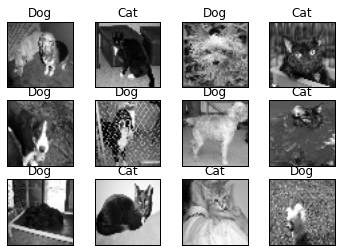

In [75]:
fig = plt.figure()

for num, data in enumerate(train_data[:12]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    #model_out = model.predict([data])[0]
    
    if img_num[0] == 0: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

In [86]:
#train = train_data[:-500]
#test = train_data[-500:]

train = train_data

#array[:,0] and array[:,1] seems NOT to work here :(
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = np.array([i[1] for i in train])

print(X.shape)
print(len(X))
print(X[1])

print(Y.shape)
print(len(Y))
print(Y[1])

#test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
#test_y = [i[1] for i in test]

(25000, 50, 50, 1)
25000
[[[ 67]
  [ 34]
  [ 30]
  ..., 
  [155]
  [132]
  [142]]

 [[ 73]
  [ 33]
  [ 27]
  ..., 
  [149]
  [145]
  [144]]

 [[ 91]
  [ 36]
  [ 30]
  ..., 
  [146]
  [136]
  [140]]

 ..., 
 [[152]
  [138]
  [146]
  ..., 
  [150]
  [128]
  [126]]

 [[167]
  [145]
  [151]
  ..., 
  [165]
  [157]
  [138]]

 [[162]
  [153]
  [149]
  ..., 
  [152]
  [146]
  [146]]]
(25000, 2)
25000
[1 0]


In [111]:
#Model
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))  
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))  
model.add(MaxPooling2D())

# Flatten CNN layers output
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))

# Optimizer
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 50, 50, 32)        832       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 64)        51264     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 128)       204928    
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 6, 6, 64)          204864    
__________

In [113]:
# Fit model
history = model.fit(X, Y, validation_split=0.2, epochs=3, batch_size=32, verbose=2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
230s - loss: 7.9886 - acc: 0.5007 - val_loss: 8.0889 - val_acc: 0.4954
Epoch 2/3
231s - loss: 7.9967 - acc: 0.5011 - val_loss: 8.0889 - val_acc: 0.4954
Epoch 3/3
247s - loss: 7.9967 - acc: 0.5011 - val_loss: 8.0889 - val_acc: 0.4954


In [114]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

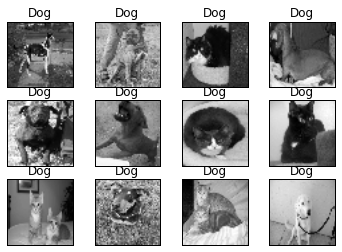

In [121]:
#https://www.youtube.com/watch?v=27FPv1VHSsQ

#test_data = process_test_data()
test_data = np.load('test_data.npy')

fig = plt.figure()

for num, data in enumerate(test_data[:12]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    
    model_out = model.predict([data])[0]
    #model_out = 1
    
    if np.argmax(model_out) == 1: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()


In [ ]:
#Inputs
# 28 x 28 image
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

In [ ]:
#Outputs
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(y_train[1,:])

In [ ]:
#Model
model = Sequential()

model.add()